### 1 - PCM

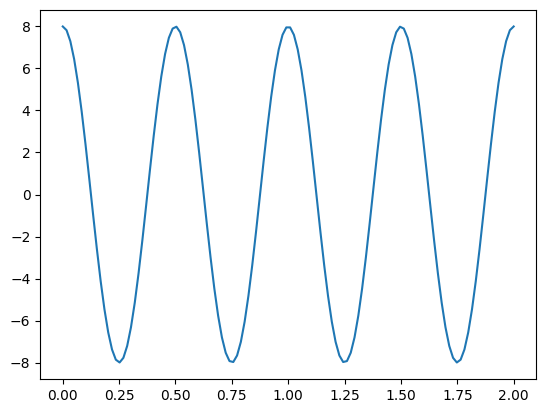

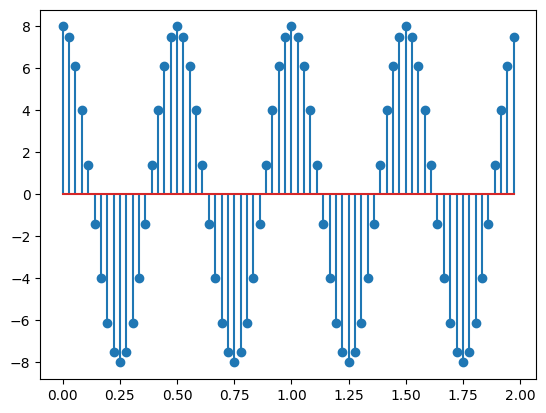

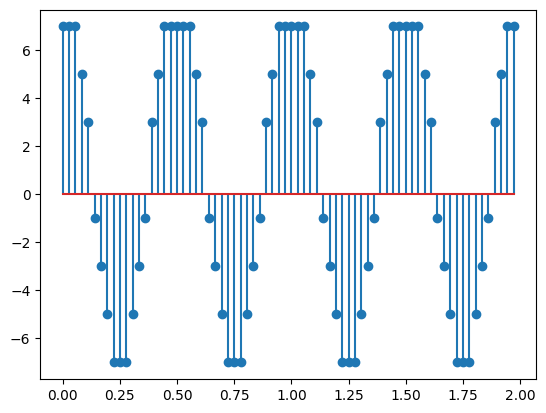

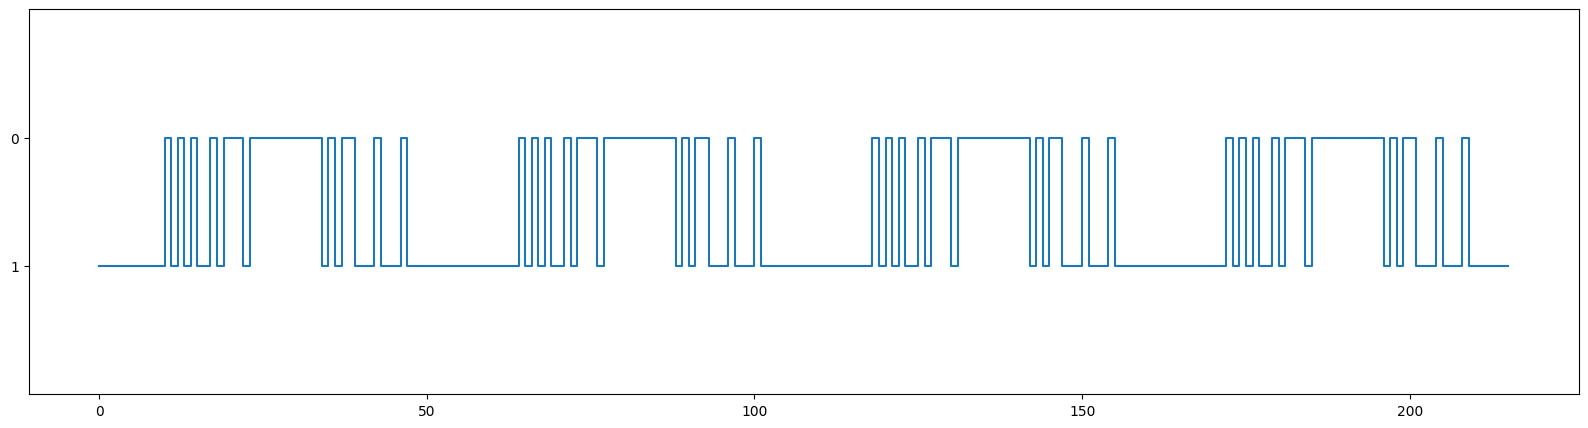

In [1]:
# import necessary library
import numpy as np
import matplotlib.pyplot as plt
import math

# create the signal with their basic properties like amplitude, frequency and time
'''
A - Amplitude of the signal
f - Frequency of the signal
t - Time variable of the signal
T - Time period of the signal
'''
A = 8                           
f = 2
T = 1 / f
t = np.linspace(0, 2.0, 120)
x = A * np.cos(2.0 * np.pi * f * t)
plt.plot(t, x)
plt.show()


'''

n = number_of_sample_per_interval
fs = sampling rate
ts = sampling interval

'''

n = 18
fs = n * f
ts=np.arange(0, 2, 1 / fs)
xs=A*np.cos(2*np.pi*f*ts);
# xs Sampled signal 
plt.stem(ts, xs)
plt.show()


'''

b_bit = b-bit quantizer, number of bits required to encode each quantization level. 
L = uniformly spaced quantization levels
partition = level are between vmin and vmax with difference of delta
codebook = decrease the partition by half of delta
xq = quantized signal
encode = assigned codec

'''
b_bit = 3
L = 2 ** b_bit
vmax=A;
vmin=-vmax;
delta=(vmax-vmin)/L;
partition = np.arange(vmin, vmax, delta)
codebook= np.arange(vmin-(delta/2),vmax+(delta/2), delta) 

xq = np.copy(xs)
encode = np.copy(xs)

for i in range(len(partition)):
  left = codebook[i]
  right = codebook[i + 1]
  for j in range(len(xs)):
    # left <= xs[i] < right
    if(i != len(partition) - 1 and left <= xs[j] and xs[j] < right):
      xq[j] = partition[i]
      encode[j] = i
    # left <= xs[i], only for last portion
    if(i == len(partition) - 1 and left <= xs[j]):
      xq[j] = partition[i]
      encode[j] = i

for i in range(len(xq)):
    xq[i] = xq[i] + (delta / 2) 

plt.stem(ts, xq)
plt.show()



def decimalToBinary(val, bit):
    binary = "{0:b}".format(int(val))
    extra_zero = bit - len(binary)
    return extra_zero * "0" + binary

binary_codec = []
for i in range(len(encode)):
  binary = decimalToBinary(encode[i], b_bit)
  for j in range(len(binary)):
    binary_codec.append(binary[j])
pos = np.arange(len(binary_codec))
plt.figure(figsize=(20, 5))
plt.ylim(-1, 2)
plt.step(pos, binary_codec)
plt.show()

### 2 - Line Coding

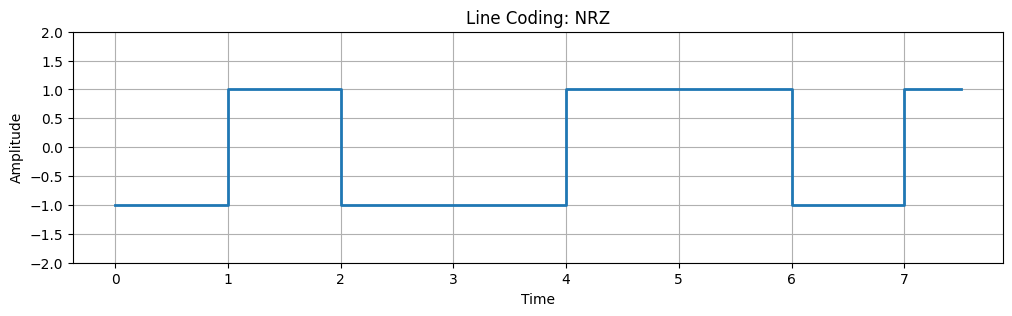

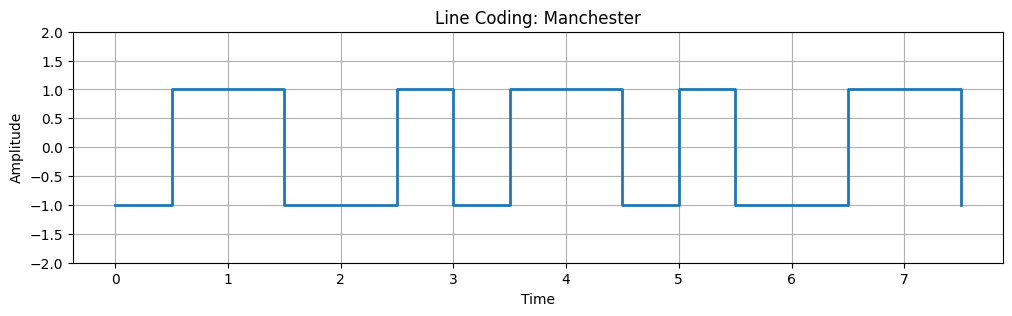

Original Data: [1, 0, 1, 1, 0, 0, 1, 0]
Block Coded Data (4B/5B): [1, 0, 1, 1, 1, 1, 0, 1, 0, 0]
Block Decoded Data (5B/4B): [1, 0, 1, 1, 0, 0, 1, 0]


In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Utility to plot the signals
def plot_signal(time, signal, title):
    """
    Plots a digital signal waveform.
    """
    plt.figure(figsize=(12, 3))
    plt.step(time, signal, where="post", linewidth=2)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.ylim(-2, 2)
    plt.show()


# Line Coding: NRZ
def nrz_line_coding(data):
    """
    Non-Return-to-Zero-Level:
    Positive voltage for 1, Negative voltage for 0.
    """
    signal = []
    time = []
    for bit in data:
        signal.extend([-1 if bit else 1, -1 if bit else 1])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def manchester_line_coding(data):
    """
    Manchester Encoding:
    Each bit has a transition in the middle.
    High-to-Low for 1, Low-to-High for 0.
    """
    signal = []
    time = []
    for bit in data:
        if bit == 1:
            signal.extend([-1, 1])  # High-to-Low for 1
        else:
            signal.extend([1, -1])  # Low-to-High for 0
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


# Block Coding: 4B/5B
def block_coding(data):
    """
    Implements 4B/5B block coding.
    """
    mapping = {
        "0000": "11110", "0001": "01001", "0010": "10100", "0011": "10101",
        "0100": "01010", "0101": "01011", "0110": "01110", "0111": "01111",
        "1000": "10010", "1001": "10011", "1010": "10110", "1011": "10111",
        "1100": "11010", "1101": "11011", "1110": "11100", "1111": "11101"
    }
    # Convert input binary list into a string
    binary_data = ''.join(map(str, data))
    # Ensure binary data is divisible by 4
    while len(binary_data) % 4 != 0:
        binary_data += "0"  # Pad with zeros if needed
    # Break into 4-bit chunks and map to 5-bit encoding
    chunks = [binary_data[i:i + 4] for i in range(0, len(binary_data), 4)]
    coded = ''.join(mapping[chunk] for chunk in chunks)
    return list(map(int, coded))


# Block Decoding: 5B/4B
def block_decoding(data):
    """
    Implements 5B/4B block decoding.
    """
    reverse_mapping = {
        "11110": "0000", "01001": "0001", "10100": "0010", "10101": "0011",
        "01010": "0100", "01011": "0101", "01110": "0110", "01111": "0111",
        "10010": "1000", "10011": "1001", "10110": "1010", "10111": "1011",
        "11010": "1100", "11011": "1101", "11100": "1110", "11101": "1111"
    }
    binary_data = ''.join(map(str, data))
    chunks = [binary_data[i:i + 5] for i in range(0, len(binary_data), 5)]
    decoded = ''.join(reverse_mapping[chunk] for chunk in chunks)
    return list(map(int, decoded))


# Test the implementation
binary_data = [1, 0, 1, 1, 0, 0, 1, 0]  # Input binary data

# Line Coding (NRZ)
time, nrz_signal = nrz_line_coding(binary_data)
plot_signal(time, nrz_signal, "Line Coding: NRZ")

# Line Coding (Manchester)
time, manchester_signal = manchester_line_coding(binary_data)
plot_signal(time, manchester_signal, "Line Coding: Manchester")

# Block Coding (4B/5B)
coded_data = block_coding(binary_data)
decoded_data = block_decoding(coded_data)

# Print results for block coding
print(f"Original Data: {binary_data}")
print(f"Block Coded Data (4B/5B): {coded_data}")
print(f"Block Decoded Data (5B/4B): {decoded_data}")


### 3 - DtA

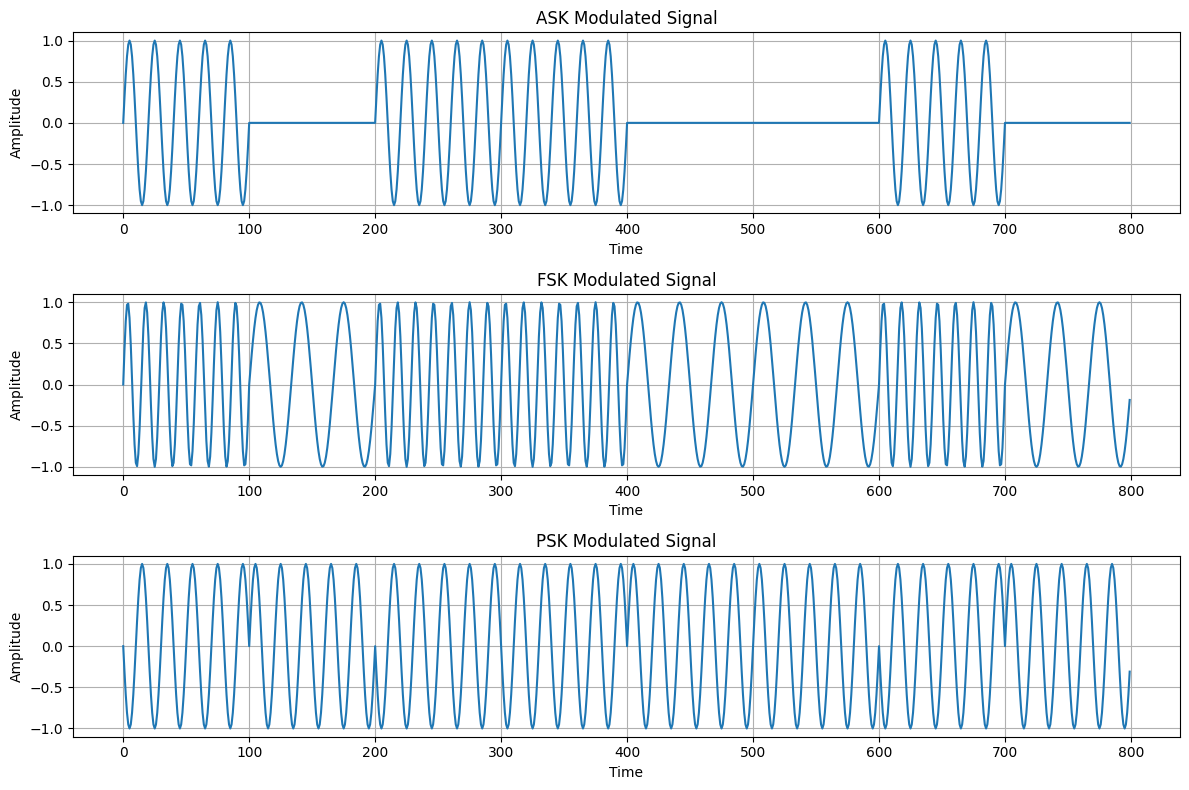

In [3]:
import numpy as np
import matplotlib.pyplot as plt

bit_rate = 1
carrier_frequency = 5  # Hz
sampling_rate = 100
time = np.arange(0, 1, 1/sampling_rate)

def ask_modulation(bits):
    modulated_signal = np.array([])
    for bit in bits:
        carrier = np.sin(2 * np.pi * carrier_frequency * time)
        if bit == 0:
            carrier *= 0
        modulated_signal = np.concatenate((modulated_signal, carrier))
    return modulated_signal

def fsk_modulation(bits):
    modulated_signal = np.array([])
    for bit in bits:
        if bit == 0: 
            carrier = np.sin(2 * np.pi * (carrier_frequency - 2) * time)
        else:
            carrier = np.sin(2 * np.pi * (carrier_frequency + 2) * time)
        modulated_signal = np.concatenate((modulated_signal, carrier))
    return modulated_signal

def psk_modulation(bits):
    modulated_signal = np.array([])
    for bit in bits:
        if bit == 0:
            carrier = np.sin(2 * np.pi * carrier_frequency * time)
        else:
            carrier = np.sin(2 * np.pi * carrier_frequency * time + np.pi)
        modulated_signal = np.concatenate((modulated_signal, carrier))
    return modulated_signal

bits = [1, 0, 1, 1, 0, 0, 1, 0]

ask_signal = ask_modulation(bits)
fsk_signal = fsk_modulation(bits)
psk_signal = psk_modulation(bits)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(ask_signal)
plt.title('ASK Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(fsk_signal)
plt.title('FSK Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(psk_signal)
plt.title('PSK Modulated Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


### 4 - DtD

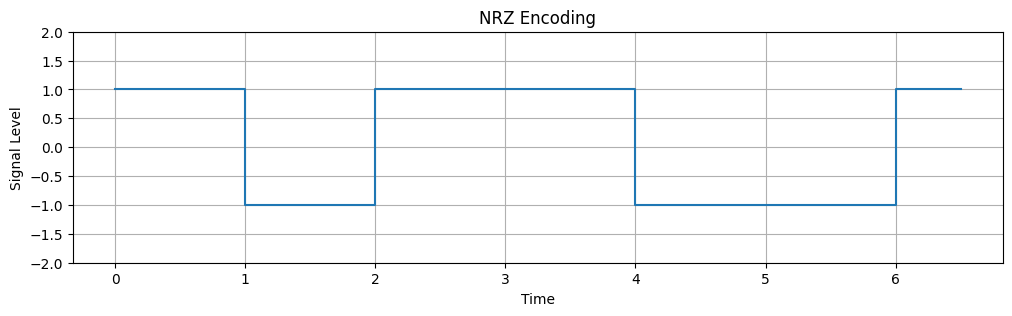

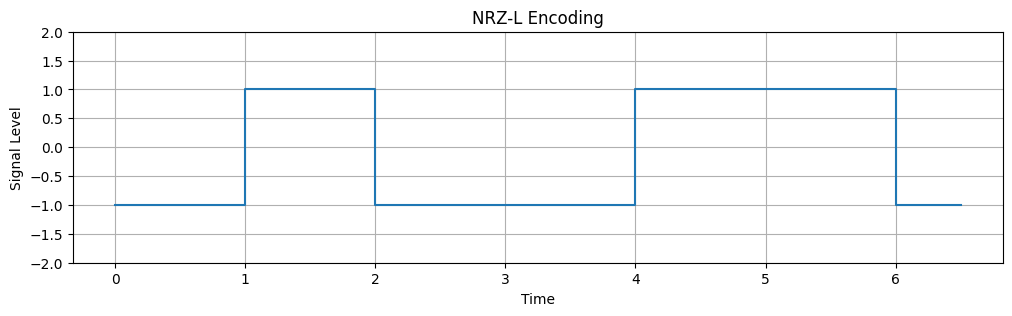

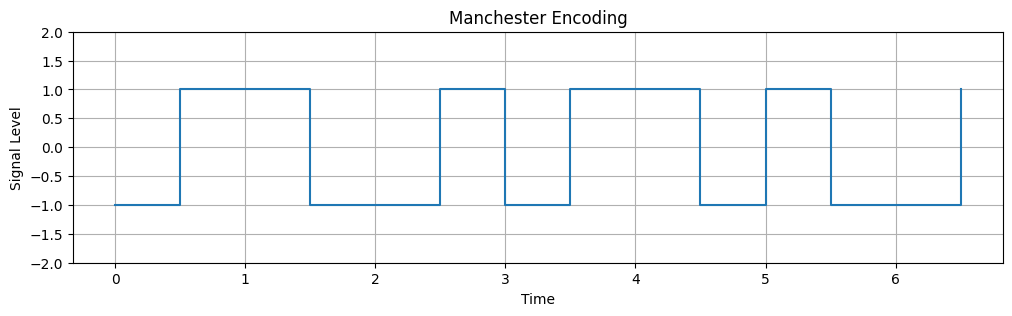

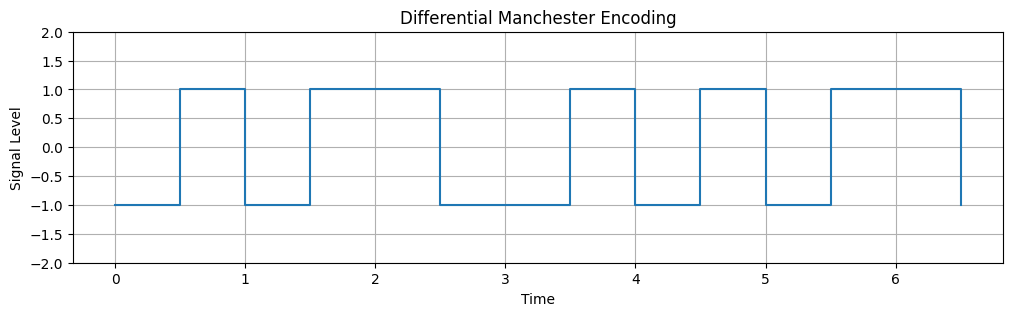

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_signal(time, signal, title):
    """
    Plots the digital waveform.
    """
    plt.figure(figsize=(12, 3))
    plt.step(time, signal, where='post')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Signal Level')
    plt.grid(True)
    plt.ylim(-2, 2)
    plt.show()


def nrz(data):
    """
    Non-Return-to-Zero encoding:
    High level for 1, Low level for 0.
    """
    signal = []
    time = []
    for bit in data:
        signal.extend([1 if bit else -1, 1 if bit else -1])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def nrz_l(data):
    """
    Non-Return-to-Zero-Level:
    Positive voltage for 1, Negative voltage for 0.
    """
    signal = []
    time = []
    for bit in data:
        signal.extend([-1 if bit else 1, -1 if bit else 1])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def manchester(data):
    """
    Manchester Encoding:
    Each bit has a transition in the middle.
    High-to-Low for 1, Low-to-High for 0.
    """
    signal = []
    time = []
    for bit in data:
        if bit == 1:
            signal.extend([-1, 1])  # High-to-Low for 1
        else:
            signal.extend([1, -1])  # Low-to-High for 0
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal


def differential_manchester(data):
    """
    Differential Manchester Encoding:
    Each bit has a transition in the middle.
    Transition at start of a 0, no transition at start of a 1.
    """
    signal = []
    time = []
    for bit in data:
        last_level = -1 if len(signal) == 0 else signal[len(signal) - 1]
        if bit == 1:
            signal.extend([last_level, -last_level])  # No initial transition
        else:
            # last_level = -last_level  # Initial transition
            signal.extend([-last_level, last_level])
        time.extend([len(time)/2, len(time)/2 + 0.5])
    return time, signal



# Input binary data
binary_data = [1, 0, 1, 1, 0, 0, 1]

# Generate and plot signals for each encoding technique
for encoding, func in [("NRZ", nrz), ("NRZ-L", nrz_l), ("Manchester", manchester), ("Differential Manchester", differential_manchester)]:
    time, signal = func(binary_data)
    plot_signal(time, signal, f"{encoding} Encoding")


### 5 - Parity Error Detection

In [5]:
def check_even_parity(block):
    # Check the row parity
    row_parity_correct = True
    for row in block:
        if sum(row) % 2 != 0:
            print(f"Row {block.index(row) + 1} has incorrect parity!")
            row_parity_correct = False

    # Check the column parity
    column_parity_correct = True
    for col in range(len(block[0])):
        column_sum = sum(row[col] for row in block)
        if column_sum % 2 != 0:
            print(f"Column {col + 1} has incorrect parity!")
            column_parity_correct = False

    if row_parity_correct and column_parity_correct:
        print("No parity errors detected.")
    else:
        print("Parity errors found.")

# Example 4x8 block
data_block = [
    [1, 0, 1, 0, 1, 0, 1, 0],  # Row 1
    [0, 1, 0, 1, 0, 1, 0, 1],  # Row 2
    [1, 1, 1, 1, 0, 0, 0, 0],  # Row 3
    [0, 0, 0, 0, 1, 1, 1, 1],  # Row 4
]

# Check parity for the given block
check_even_parity(data_block)


No parity errors detected.


### 6 - CRC

In [7]:
def xor(a, b):
    """Perform XOR operation between two binary strings."""
    result = []
    for i in range(1, len(b)):
        result.append('0' if a[i] == b[i] else '1')
        # print(a[i]+" "+b[i])
    # print()
    return ''.join(result)


def mod2div(dividend, divisor):
    """
    Perform Modulo-2 division.
    :param dividend: The binary string (data + appended zeros).
    :param divisor: The generator polynomial.
    :return: The remainder after Modulo-2 division.
    """
    pick = len(divisor)
    tmp = dividend[:pick]
    # print("tmp :   : " + tmp+" " + divisor)

    while pick < len(dividend):
        if tmp[0] == '1':
            # print("1 : "+ xor(divisor,tmp))
            tmp = xor(divisor, tmp) + dividend[pick]
            # print(tmp)
        else:
            # print("2 : "+ xor('0' * pick, tmp))
            tmp = xor('0' * pick, tmp) + dividend[pick]
            # print(tmp)
        pick += 1
        


    if tmp[0] == '1':
        tmp = xor(divisor, tmp)
    else:
        tmp = xor('0' * pick, tmp)
    

    return tmp


def encode_data(data, key):
    """
    Encodes the input data using the CRC generator polynomial.
    :param data: The input binary data string.
    :param key: The generator polynomial.
    :return: The transmitted data (data + CRC code).
    """
    appended_data = data + '0' * (len(key) - 1)
    remainder = mod2div(appended_data, key)
    transmitted_data = data + remainder
    return transmitted_data


def check_data(transmitted_data, key):
    """
    Checks received data for errors using CRC.
    :param transmitted_data: The received binary data string.
    :param key: The generator polynomial.
    :return: Boolean indicating whether the data has errors.
    """
    remainder = mod2div(transmitted_data, key)
    return remainder == '0' * (len(key) - 1)


# Example Usage
data = "1011001"  # Binary data to transmit
key = "1101"      # Generator polynomial

print("Original Data: ", data)
transmitted_data = encode_data(data, key)
print("Transmitted Data (with CRC): ", transmitted_data)

# Simulating received data
received_data = transmitted_data  # No error
print("Received Data: ", received_data)
if check_data(received_data, key):
    print("No Error Detected.")
else:
    print("Error Detected.")


Original Data:  1011001
Transmitted Data (with CRC):  1011001110
Received Data:  1011001110
No Error Detected.
